In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

plt.style.use('fivethirtyeight')
%matplotlib inline

In [ ]:
import yfinance as yf
import datetime as dt
stock='NVDA'

start=dt.datetime(2000,1,1)
end=dt.datetime(2024,11,1)

df=yf.download(stock,start,end)
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,,
2000-01-03,0.089440,0.097526,0.099219,0.091927,0.098438,300912000
2000-01-04,0.087052,0.094922,0.096094,0.090104,0.095833,300480000
2000-01-05,0.084186,0.091797,0.093750,0.090495,0.092188,188352000
2000-01-06,0.078692,0.085807,0.091797,0.082292,0.091797,120480000
2000-01-07,0.080007,0.087240,0.088151,0.084115,0.085417,71184000


In [ ]:
df.shape

(6248, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6248 entries, 2000-01-03 to 2024-10-31
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, NVDA)  6248 non-null   float64
 1   (Close, NVDA)      6248 non-null   float64
 2   (High, NVDA)       6248 non-null   float64
 3   (Low, NVDA)        6248 non-null   float64
 4   (Open, NVDA)       6248 non-null   float64
 5   (Volume, NVDA)     6248 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 341.7 KB


In [ ]:
df.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
count,6248.000000,6248.000000,6248.000000,6248.000000,6248.000000,6.248000e+03
mean,7.643564,7.671624,7.812950,7.516272,7.670458,6.162950e+08
std,20.194325,20.192829,20.577377,19.772717,20.202910,4.293129e+08
min,0.056325,0.061417,0.065667,0.060000,0.060833,4.564400e+07
25%,0.274438,0.299000,0.305729,0.293187,0.299875,3.562642e+08
50%,0.445146,0.477292,0.484750,0.470375,0.477875,5.138220e+08
75%,4.631143,4.668063,4.747937,4.613125,4.657813,7.410270e+08
max,143.700104,143.710007,144.419998,141.779999,143.000000,9.230856e+09


In [ ]:
df.isnull().sum()

,,0
Price,Ticker,
Adj Close,NVDA,0
Close,NVDA,0
High,NVDA,0
Low,NVDA,0
Open,NVDA,0
Volume,NVDA,0


In [ ]:
df.columns

MultiIndex([('Adj Close', 'NVDA'),
            (    'Close', 'NVDA'),
            (     'High', 'NVDA'),
            (      'Low', 'NVDA'),
            (     'Open', 'NVDA'),
            (   'Volume', 'NVDA')],
           names=['Price', 'Ticker'])

In [ ]:
df=df.reset_index()


In [ ]:
df.columns

MultiIndex([(     'Date',     ''),
            ('Adj Close', 'NVDA'),
            (    'Close', 'NVDA'),
            (     'High', 'NVDA'),
            (      'Low', 'NVDA'),
            (     'Open', 'NVDA'),
            (   'Volume', 'NVDA')],
           names=['Price', 'Ticker'])

In [ ]:
# to make candle sticks we have to have the file first

In [ ]:
df.to_csv('NVDA.csv')

In [ ]:
data01=pd.read_csv('NVDA.csv')

In [ ]:
data01.head()

,Price,Date,Adj Close,Close,High,Low,Open,Volume
0,Ticker,NaN,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
1,0,2000-01-03,0.08943965286016464,0.09752599895000458,0.09921900182962418,0.09192699939012527,0.09843800216913223,300912000
2,1,2000-01-04,0.08705156296491623,0.09492199867963791,0.09609399735927582,0.09010399878025055,0.09583300352096558,300480000
3,2,2000-01-05,0.08418568223714828,0.09179700165987015,0.09375,0.09049499779939651,0.09218800067901611,188352000
4,3,2000-01-06,0.07869232445955276,0.08580700308084488,0.09179700165987015,0.08229199796915054,0.09179700165987015,120480000


In [ ]:
# Candlesticks
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x = data01['Date'], open = data01['Open'],
                                    high = data01['High'],
                                    low = data01['Low'],
                                    close = data01['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [ ]:
# # Extract month and year
# df['YearMonth'] = df['Date'].dt.to_period('M').astype(str)

# # Calculate monthly average Close prices
# monthly_avg = df.groupby('YearMonth')['Close'].mean().reset_index()

# # Plot
# plt.figure(figsize=(12, 6))
# plt.bar(monthly_avg['YearMonth'], monthly_avg['Close'], color='teal')
# plt.title('Monthly Average Close Prices')
# plt.xlabel('Month-Year')
# plt.ylabel('Average Close Price')
# plt.xticks(rotation=45)
# plt.show()


In [ ]:
df = df.drop(['Date', 'Adj Close'], axis = 1)

<ipython-input-31-8e9e58ec18af>:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [ ]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
0,0.097526,0.099219,0.091927,0.098438,300912000
1,0.094922,0.096094,0.090104,0.095833,300480000
2,0.091797,0.093750,0.090495,0.092188,188352000
3,0.085807,0.091797,0.082292,0.091797,120480000
4,0.087240,0.088151,0.084115,0.085417,71184000


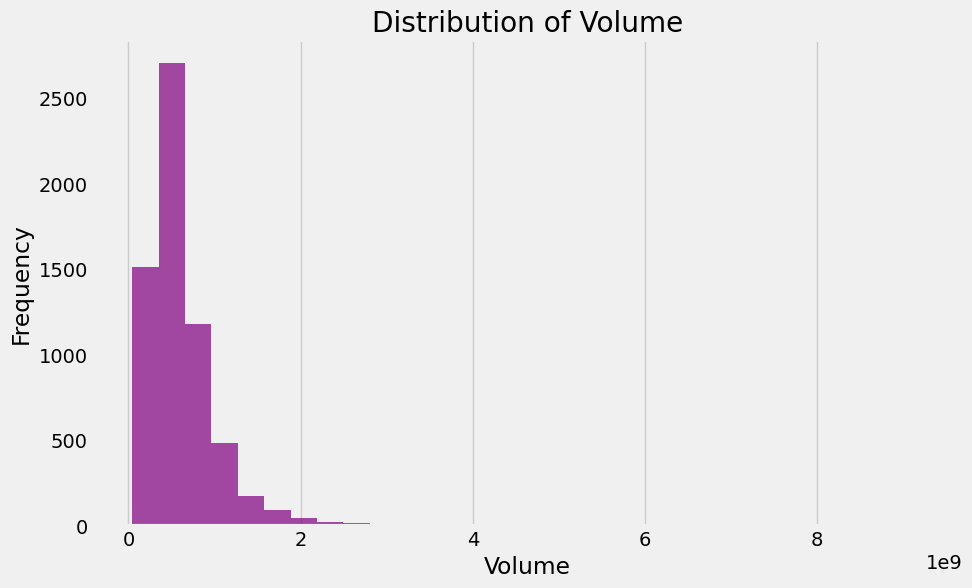

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df['Volume'], bins=30, color='purple', alpha=0.7)
plt.title('Distribution of Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()


In [ ]:
df.columns

MultiIndex([( 'Close', 'NVDA'),
            (  'High', 'NVDA'),
            (   'Low', 'NVDA'),
            (  'Open', 'NVDA'),
            ('Volume', 'NVDA')],
           names=['Price', 'Ticker'])

In [ ]:
# import seaborn as sns

# plt.figure(figsize=(8, 6))
# sns.boxplot(y=df['Close']['NVDA'], color='orange')
# plt.title('Box Plot of Close Price')
# plt.ylabel('Close Price')
# plt.show()


In [ ]:
# import seaborn as sns

# plt.figure(figsize=(8, 6))
# sns.boxplot(y=df['Volume']['NVDA'], color='orange')
# plt.title('Box Plot of Close Price')
# plt.ylabel('OPEN Price')
# plt.show()


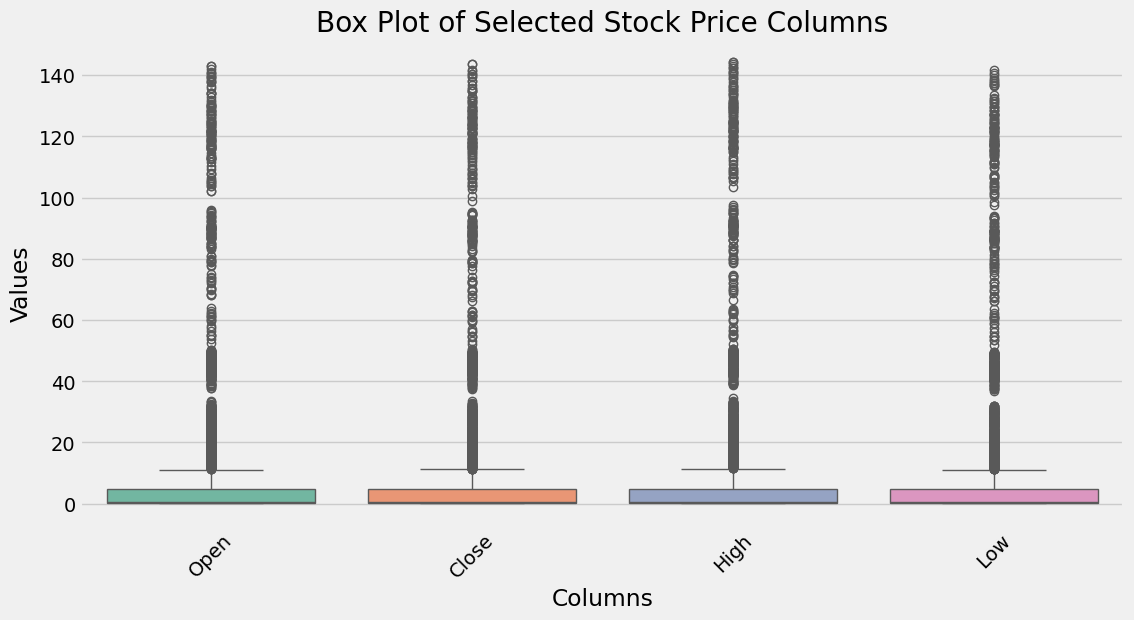

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `df` is your DataFrame and has columns 'Volume', 'Open', 'Close', etc.

# Selecting specific columns to plot
columns_to_plot = ['Open', 'Close', 'High', 'Low']  # Replace with your desired columns
subset = df[columns_to_plot]

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=subset, palette='Set2')  # Use data=subset to plot all selected columns
plt.title('Box Plot of Selected Stock Price Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Open']['NVDA'], color='orange')
plt.title('Box Plot of Close Price')
plt.ylabel('OPEN Price')
plt.show()


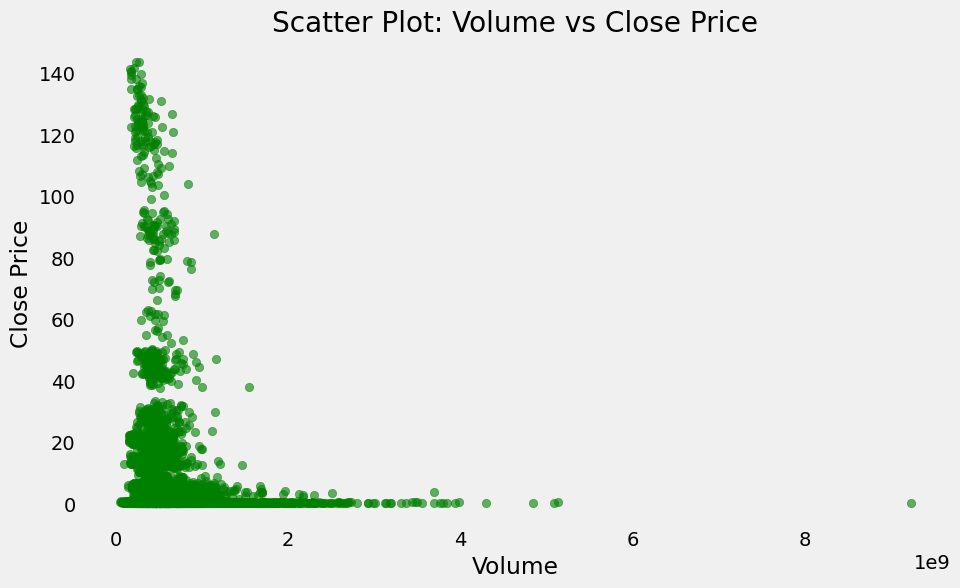

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Volume'], df['Close'], alpha=0.6, color='green')
plt.title('Scatter Plot: Volume vs Close Price')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.grid()
plt.show()


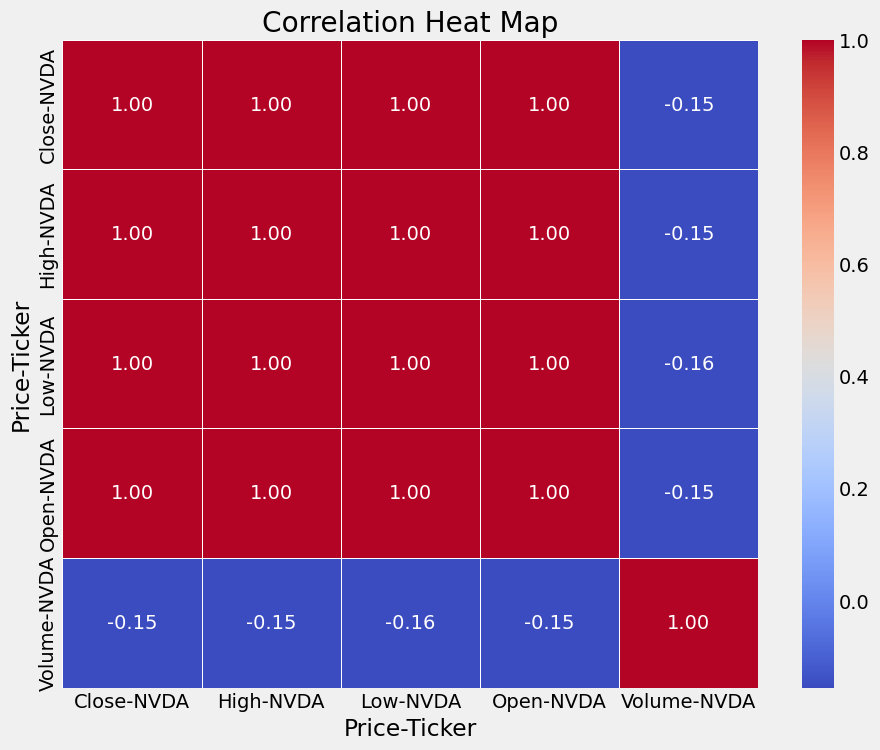

In [ ]:
# Compute correlation
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heat Map')
plt.show()


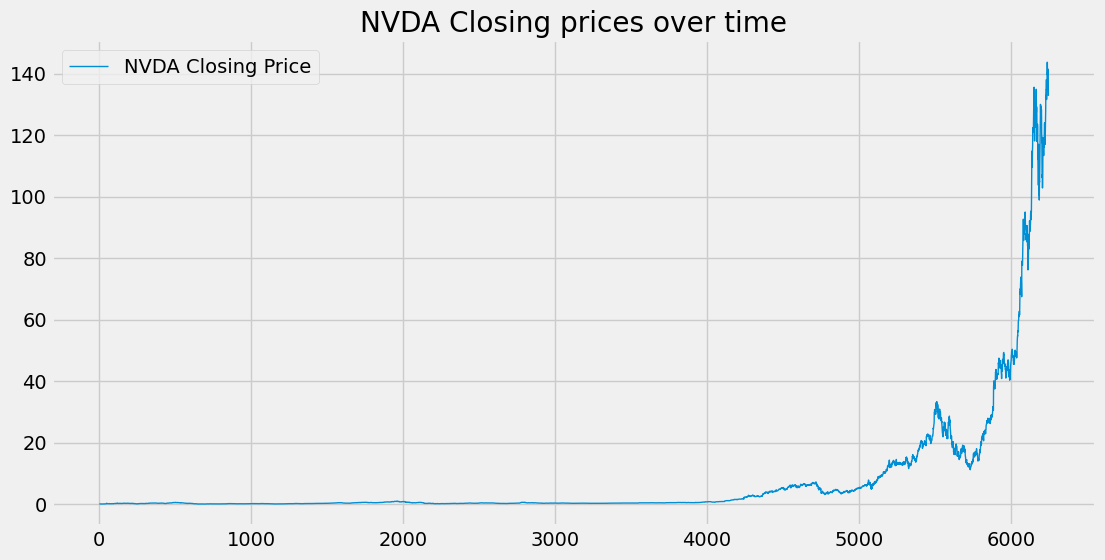

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label = f'{stock} Closing Price', linewidth = 1)
plt.title(f'{stock} Closing prices over time')
plt.legend()
plt.show()

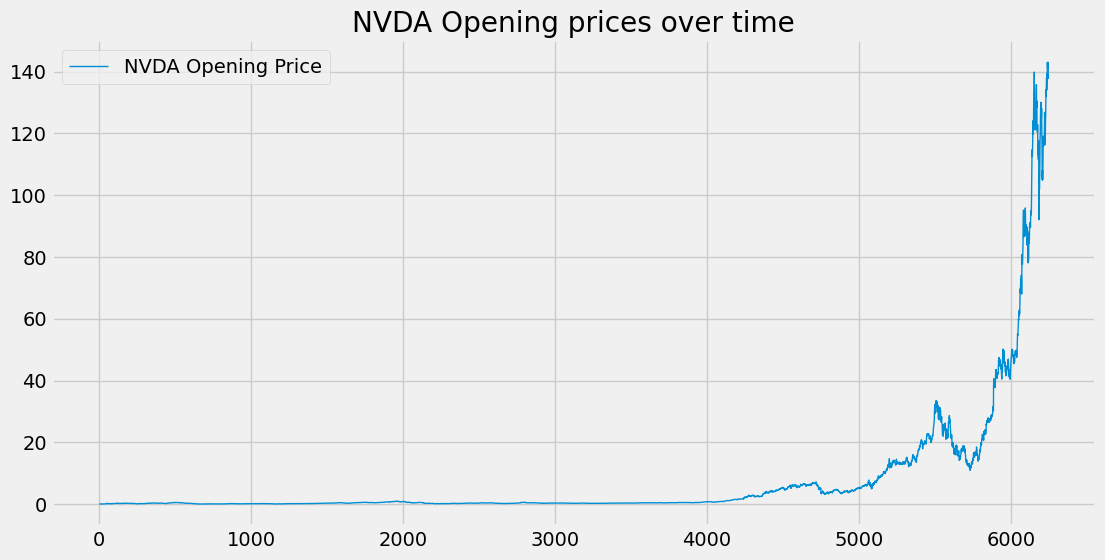

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['Open'], label = f'{stock} Opening Price', linewidth = 1)
plt.title(f'{stock} Opening prices over time')
plt.legend()
plt.show()

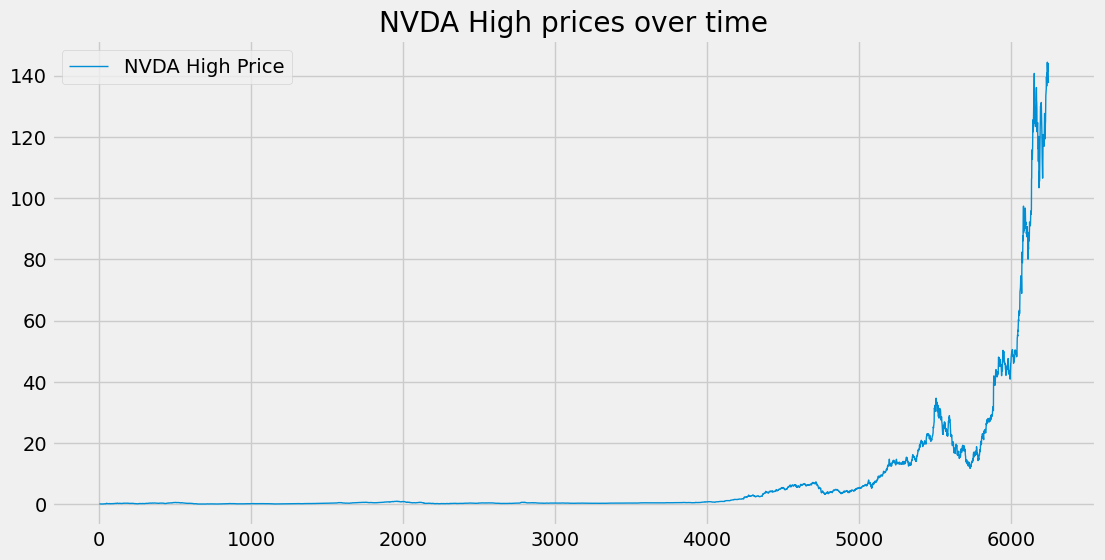

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['High'], label = f'{stock} High Price', linewidth = 1)
plt.title(f'{stock} High prices over time')
plt.legend()
plt.show()

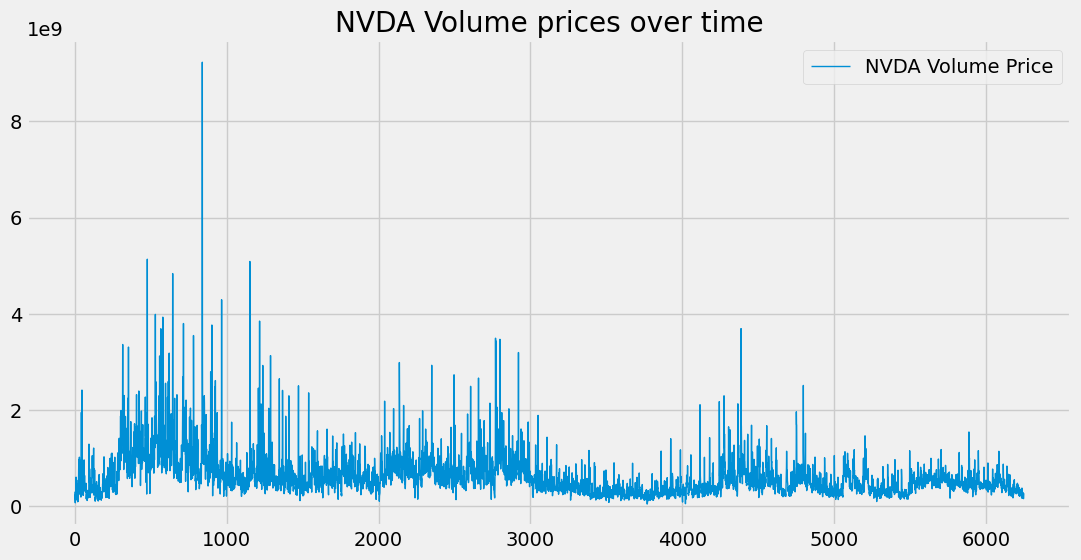

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['Volume'], label = f'{stock} Volume Price', linewidth = 1)
plt.title(f'{stock} Volume prices over time')
plt.legend()
plt.show()

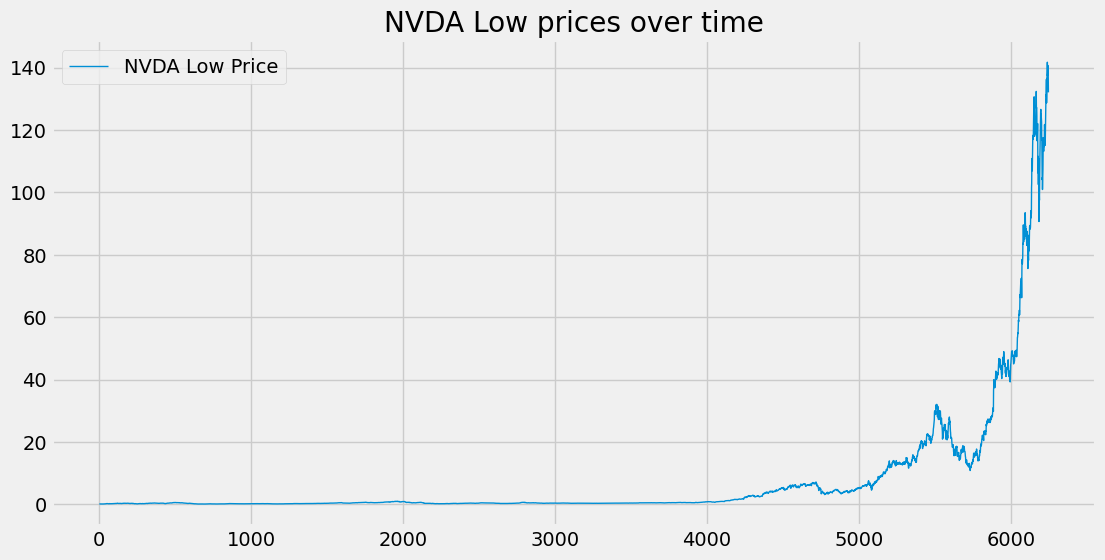

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['Low'], label = f'{stock} Low Price', linewidth = 1)
plt.title(f'{stock} Low prices over time')
plt.legend()
plt.show()

In [ ]:
# using moving averages to to calculate the prediction of next days

In [ ]:
ma100 = df.Close.rolling(100).mean()

In [ ]:
ma200 = df.Close.rolling(200).mean()

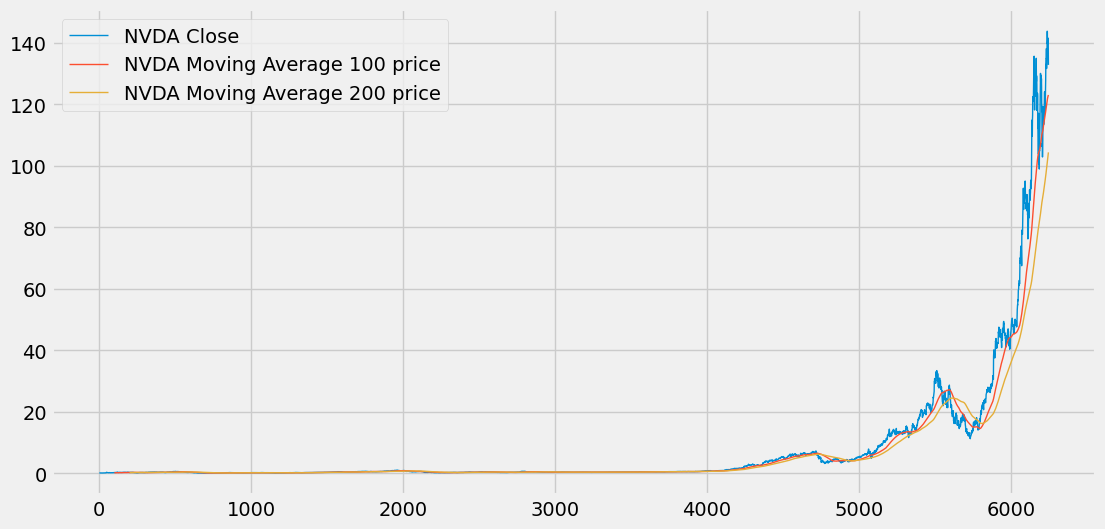

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label = f'{stock} Close', linewidth = 1)
plt.plot(ma100, label = f'{stock} Moving Average 100 price', linewidth = 1)
plt.plot(ma200, label = f'{stock} Moving Average 200 price', linewidth = 1)
plt.legend()
plt.show()

In [ ]:
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

In [ ]:
data_training.shape

(4373, 1)

In [ ]:
data_testing.shape

(1875, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))


In [ ]:
data_training_array = scaler.fit_transform(data_training)

In [ ]:
data_training_array

array([[0.01075046],
       [0.00997519],
       [0.00904481],
       ...,
       [0.93234261],
       [0.97216298],
       [0.99397117]])

In [ ]:
data_training_array.shape[0]

4373

In [ ]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train  = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(4273, 100, 1)

In [ ]:
y_train.shape

(4273,)

In [ ]:
# Model Building
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
134/134 ━━━━━━━━━━━━━━━━━━━━ 22s 88ms/step - loss: 0.0089
Epoch 2/5
134/134 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - loss: 0.0018
Epoch 3/5
134/134 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - loss: 0.0018
Epoch 4/5
134/134 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0015
Epoch 5/5
134/134 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0013


In [ ]:
past_100_days = data_training.tail(100)

In [ ]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [ ]:
final_df.head()

Ticker,NVDA
0,2.93300
1,2.73125
2,2.78575
3,2.66850
4,2.55025


In [ ]:
input_data = scaler.fit_transform(final_df)

In [ ]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test, y_test  = np.array(x_test), np.array(y_test)

In [ ]:
x_test.shape

(1875, 100, 1)

In [ ]:
y_predicted = model.predict(x_test)

59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step


In [ ]:
y_predicted.shape

(1875, 1)

In [ ]:
scaler.scale_

array([0.007076])

In [ ]:
scaler_factor = 1 / 0.0035166
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

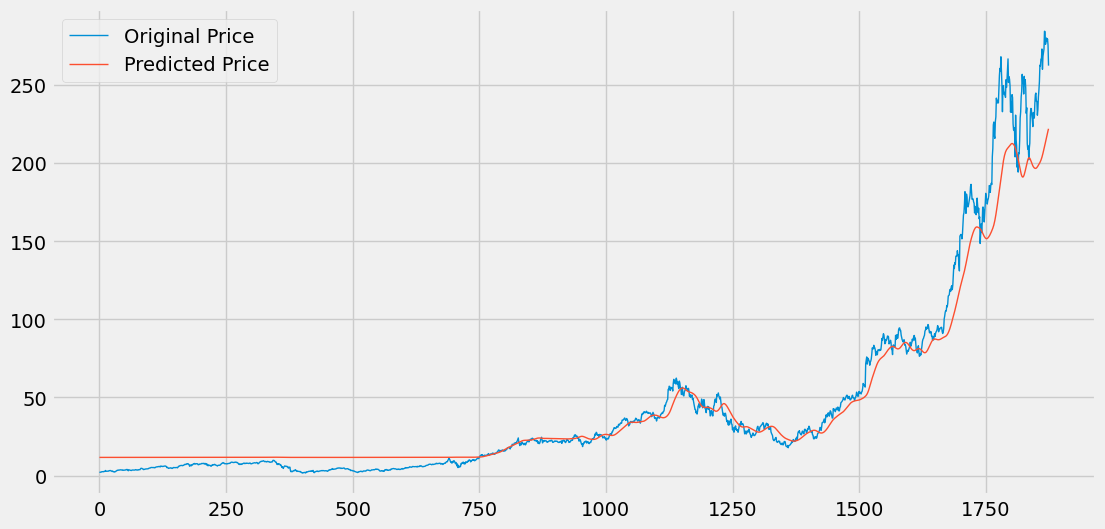

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label = 'Original Price', linewidth = 1)
plt.plot(y_predicted, label = 'Predicted Price', linewidth = 1)
plt.legend()
plt.show()

In [ ]:
model.save('stock_dl_model.h5')